##import dataset

In [126]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (4).json


{'kaggle (4).json': b'{"username":"rinajuniar","key":"ba0fa2bb67a3459df73f533ccbc20379"}'}

In [127]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [128]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

heart-attack-analysis-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [129]:
!mkdir heart-attack-analysis-prediction-dataset
!unzip heart-attack-analysis-prediction-dataset -d heart-attack-analysis-prediction-dataset
!ls heart-attack-analysis-prediction-dataset

mkdir: cannot create directory ‘heart-attack-analysis-prediction-dataset’: File exists
Archive:  heart-attack-analysis-prediction-dataset.zip
replace heart-attack-analysis-prediction-dataset/heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: heart.csv  o2Saturation.csv


##import libary yang digunakan

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

##data discovery

In [131]:
df = pd.read_csv('/content/heart-attack-analysis-prediction-dataset/heart.csv')

In [132]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [133]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [134]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [135]:
df.isnull()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##EDA

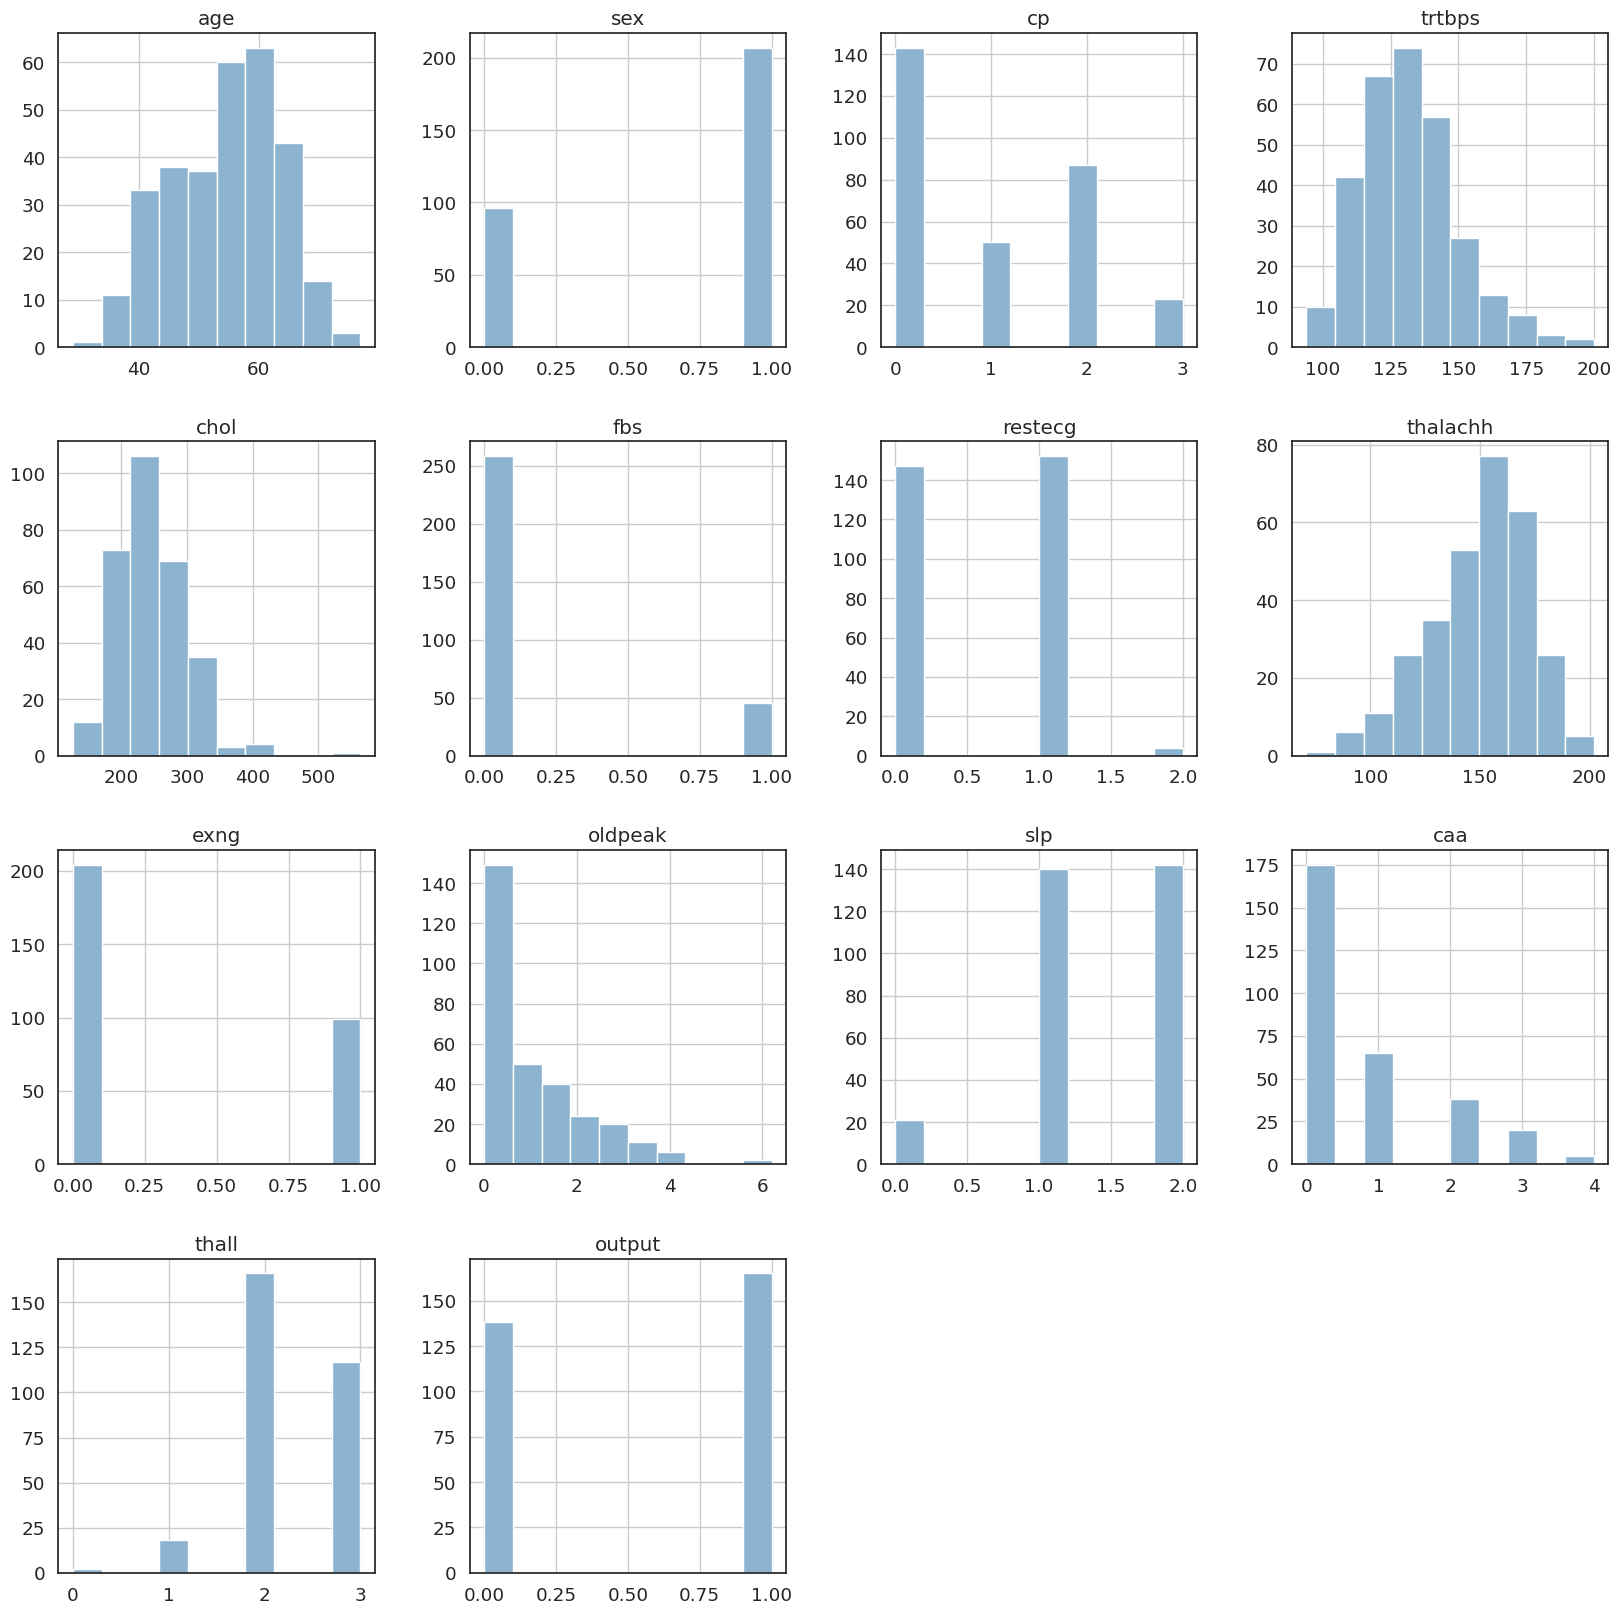

In [137]:
a = df.hist(figsize = (20,20))

<ipython-input-138-98a3cf669f0b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sex'], hist_kws = dict(linewidth = 1, edgecolor = 'k'))


<Axes: xlabel='sex', ylabel='Density'>

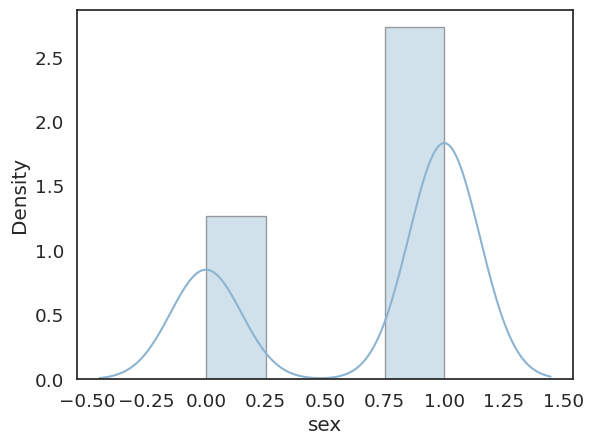

In [138]:
sns.distplot(df['sex'], hist_kws = dict(linewidth = 1, edgecolor = 'k'))

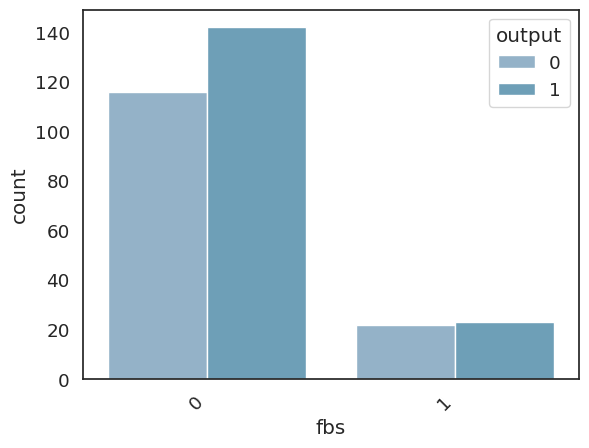

In [139]:
sns.countplot(data=df,x='fbs',hue='output')
plt.xticks(rotation=45,ha='right');

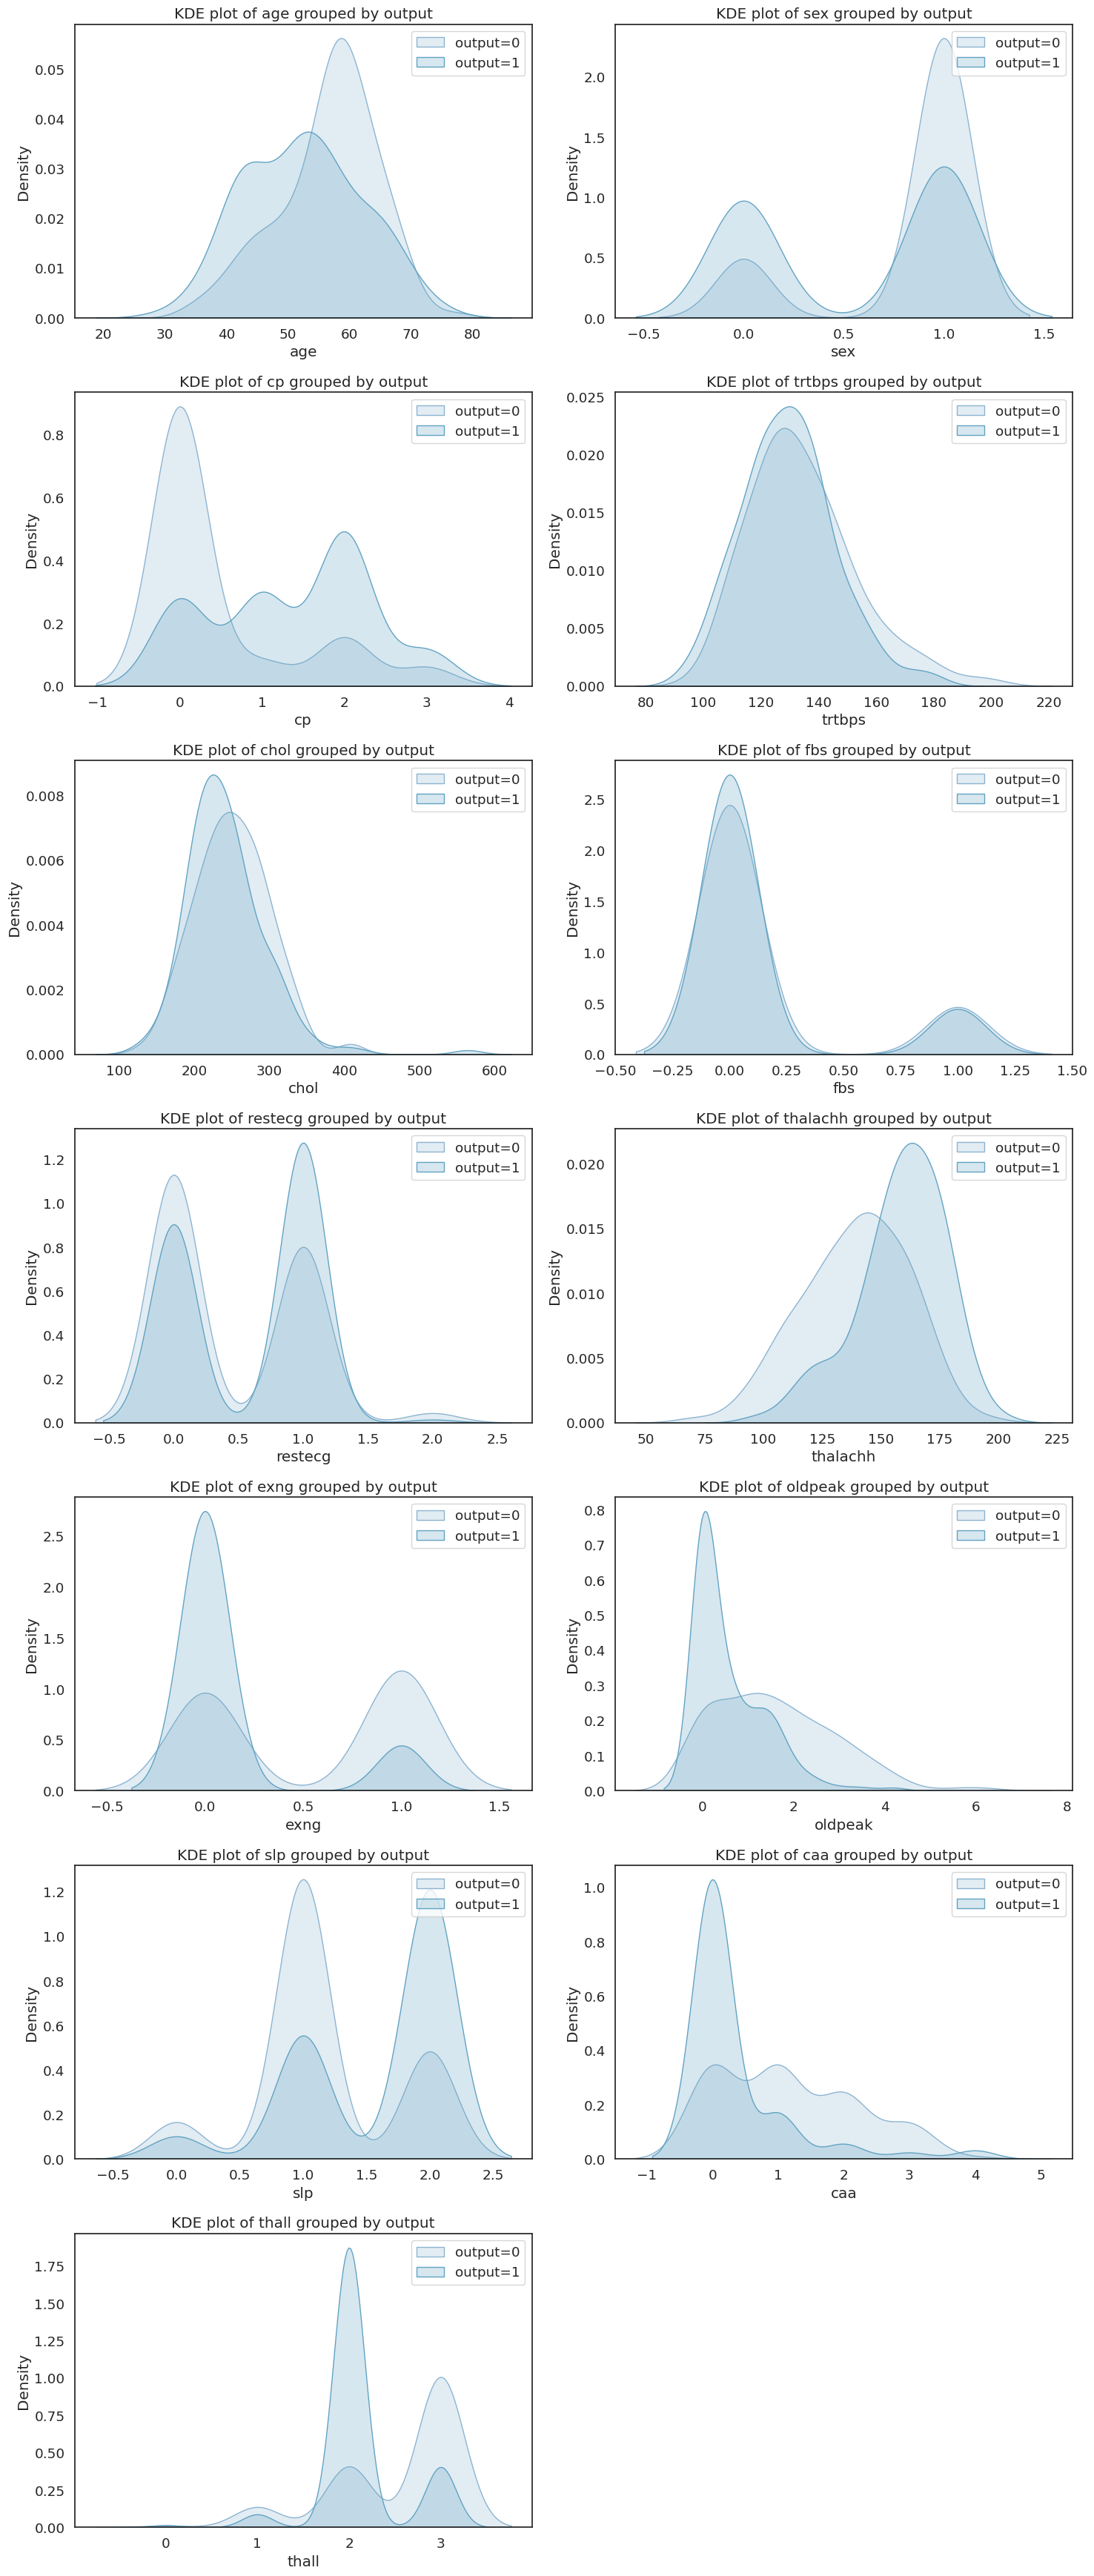

In [140]:
num_columns = len(df.columns) - 1
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(15, 5*num_rows))


for i, column in enumerate(df.columns.drop('output')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['output'] == 0][column], label='output=0', fill=True)
    sns.kdeplot(data=df[df['output'] == 1][column], label='output=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by output')
    plt.legend()

plt.tight_layout()
plt.show()

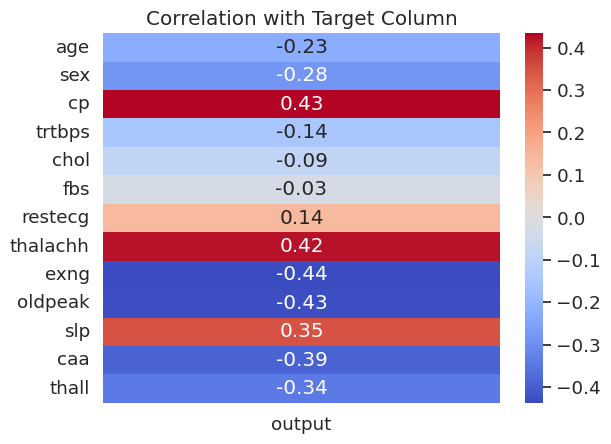

In [141]:
corr = df.corr()

target_corr = corr['output'].drop('output')

sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Target Column')
plt.show()

<Axes: >

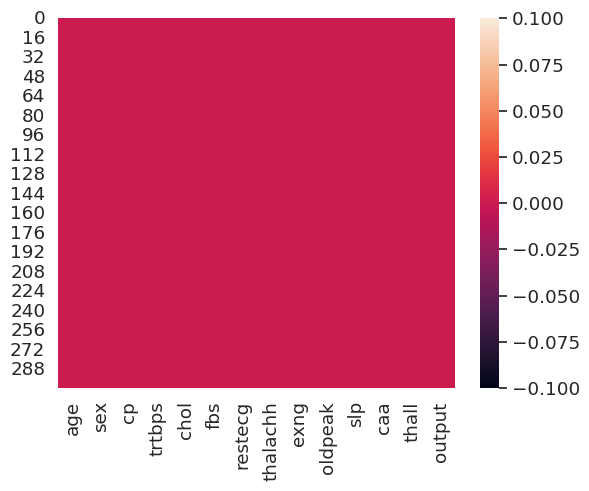

In [142]:
sns.heatmap(df.isnull())

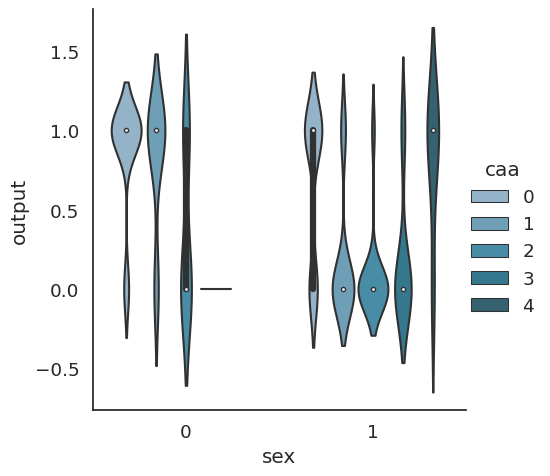

In [143]:
sns.catplot(x= "sex", y = "output", hue = "caa",kind = "violin", data = df);

##preprocesssing

In [144]:
df=df.drop(['age'],axis=1)

In [145]:
df=df.drop(['trtbps'],axis=1)

In [146]:
df=df.drop(['chol'],axis=1)

In [147]:
df=df.drop(['thalachh'],axis=1)

In [148]:
df=df.drop(['oldpeak'],axis=1)

In [149]:
atribut = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
x = df[atribut]
y = df['output']

In [150]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=90)
y_test.shape

(76,)

##MODELING

In [151]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
y_pred1=knn.predict(X_test)

score = knn.score(X_test, y_test)
print('Akurasi Model KNN =',score)

Akurasi Model KNN = 0.7763157894736842


In [152]:
input_data = (0,	0,	1,	1,	1,	1,	2, 3)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshape)
print(prediction)

if (prediction):
    print("Pasien Terkena Penyakit Jantung.")
else:
    print("Pasien Tidak Terkena Penyakit Jantung.")

[0]
Pasien Tidak Terkena Penyakit Jantung.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


##visualisasi

In [153]:
train_acc = {}
test_acc = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
  knn =  KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(x_train, y_train)
  train_acc[neighbor] = knn.score(x_train, y_train)

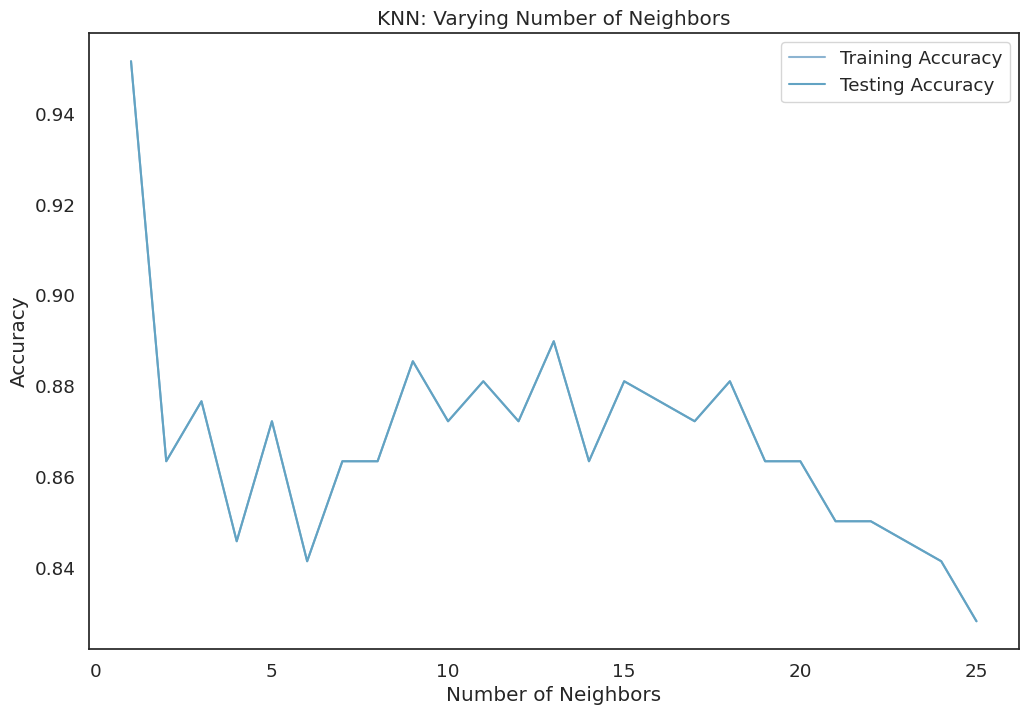

In [154]:
plt.figure(figsize=(12,8))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_acc.values(), label="Training Accuracy")
plt.plot(neighbors, train_acc.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

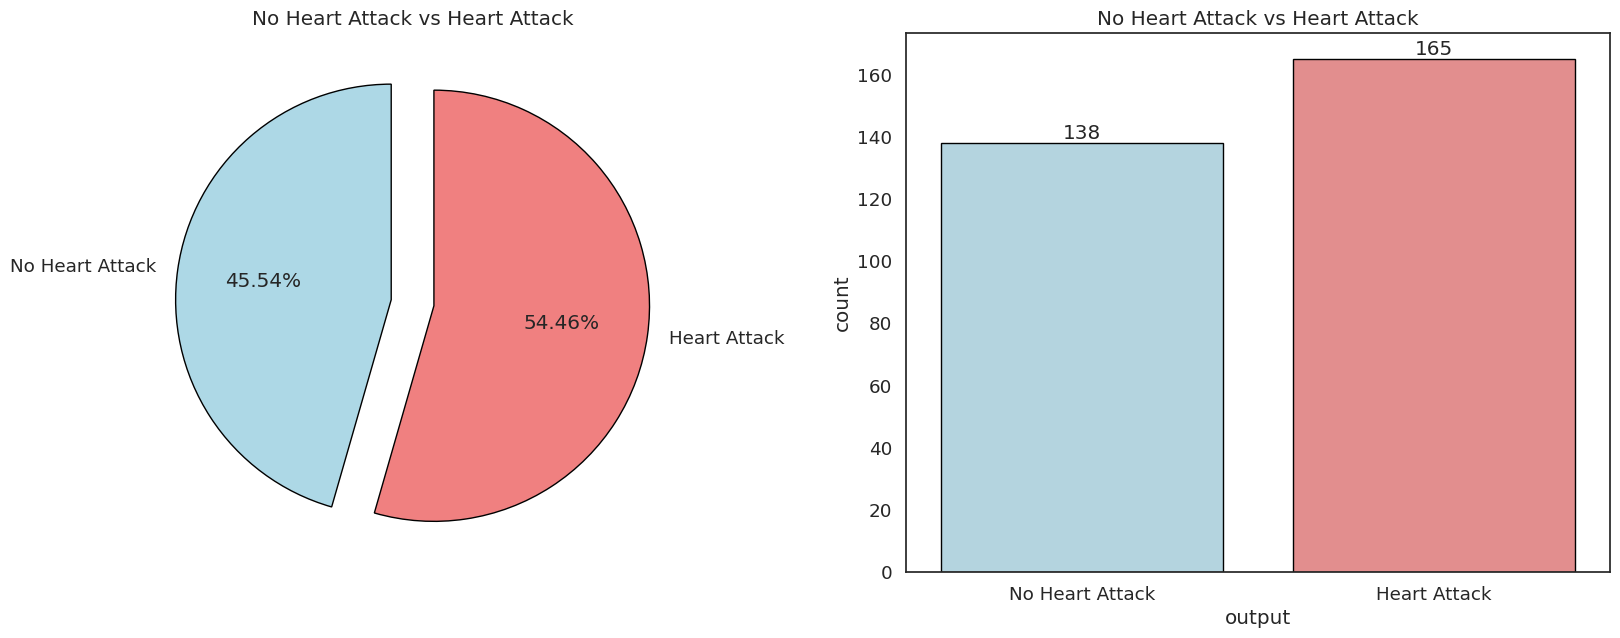

In [155]:
palette = ["#FF0000", "#0000FF"]

Diabetes_count = df['output'].value_counts()[1]
No_Diabetes_count = df['output'].value_counts()[0]
total_count = len(df)
diabetes_percentage = (Diabetes_count / total_count) * 100
no_diabetes_percentage = (No_Diabetes_count / total_count) * 100

pie_values = [no_diabetes_percentage, diabetes_percentage]

colors = ['lightblue', 'lightcoral']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
# First subplot - Pie chart
plt.subplot(1, 2, 1)
plt.pie(pie_values, labels=['No Heart Attack', 'Heart Attack'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors=colors,  # Use the defined colors
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('No Heart Attack vs Heart Attack')

# Second subplot - Countplot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df,
                x='output',
                palette=colors,  # Use the defined colors
                edgecolor='black')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticks([0, 1])  # Set ticks manually to match the categories
ax.set_xticklabels(['No Heart Attack', 'Heart Attack'])

plt.title('No Heart Attack vs Heart Attack')
plt.show()

In [156]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[19, 12],
       [ 5, 40]])

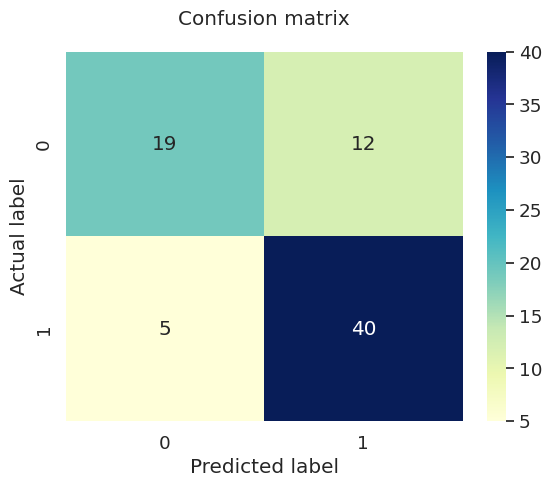

In [157]:
sns.heatmap((confusion_matrix(y_test,y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.05)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

##save model

In [158]:
df.to_csv('heart-data.csv')

In [159]:
filename = 'heart.sav'
pickle.dump(knn,open(filename,'wb'))